In [1]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model , load_model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding

# CNN
from tensorflow.keras.layers     import Conv2D , MaxPooling2D , AveragePooling2D

from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam , RMSprop

# 이미지 로드
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
import numpy  as np
import pandas as pd


In [2]:
import os

os.environ["0"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11921876868986933393
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2920035124
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16554660150429301200
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2"
 xla_global_id: 416903419]

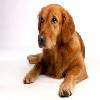

In [4]:
img = image.load_img('c:/users/crid2/ml-data/test_dog.png' , target_size = (100, 100) )
img

In [5]:
print('rows - width , cols - height , channels - rgb')
img = image.img_to_array(img)
img = np.expand_dims(img , axis = 0) 
image_ = np.vstack([img]) 
image_.shape

rows - width , cols - height , channels - rgb


(1, 100, 100, 3)

In [6]:
print('CNN - Convolution Neural Network 합성곱 신경망 - ')
print('CNN 핵심 - 합성곱레이어와 풀링레이어')
print('padding  - valid , same')
print('filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이')
print('kernel_size - 연산을 수행할 때 원도우의 크기')
print('strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정')
model = Sequential() 

model.add( Conv2D(input_shape = (10, 10, 3) , 
                  filters = 10 , 
                  kernel_size = (3,3) , 
                  strides = (1,1) , 
                  padding = 'same') )

CNN - Convolution Neural Network 합성곱 신경망 - 
CNN 핵심 - 합성곱레이어와 풀링레이어
padding  - valid , same
filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이
kernel_size - 연산을 수행할 때 원도우의 크기
strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정


In [7]:
model.output_shape

(None, 10, 10, 10)

In [8]:
print('풀링 - pooling ')
print('원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - ')
print()

# model.add( MaxPooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
# print(model.output_shape)

model.add( AveragePooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
print(model.output_shape)


풀링 - pooling 
원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - 

(None, 9, 9, 10)


In [9]:
datasets = load_digits()
datasets.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
datasets.images[0].shape

(8, 8)

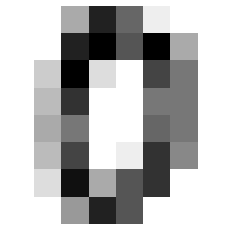

In [11]:
plt.figure()

plt.imshow(datasets.images[0] , cmap = plt.cm.binary)
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

In [12]:
datasets.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
X_data = datasets.images
y_data = datasets.target

In [14]:
X_data.shape , y_data.shape

((1797, 8, 8), (1797,))

In [15]:
X_data = X_data.reshape(X_data.shape[0] , X_data.shape[1]  , X_data.shape[2] , 1) 
X_data.shape , y_data.shape

((1797, 8, 8, 1), (1797,))

In [16]:
y_data = to_categorical(y_data)
y_data.shape

(1797, 10)

In [17]:
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
X_data.shape , y_data.shape

((1797, 8, 8, 1), (1797, 10))

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X_data , 
                                                       y_data , 
                                                       test_size    = 0.2 ,
                                                       random_state = 111)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

In [20]:
print('cnn 입력층 - ')
mnist_cnn_model = Sequential()
mnist_cnn_model.add( Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]) , 
                            filters = 10 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'valid' , activation = 'relu') ) 

print('shape - ' , mnist_cnn_model.output_shape)

cnn 입력층 - 
shape -  (None, 6, 6, 10)


In [21]:
print('cnn 풀링레이어 만들기 - ')

mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
print(mnist_cnn_model.output_shape)


cnn 풀링레이어 만들기 - 
(None, 3, 3, 10)


In [22]:
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.output_shape

(None, 90)

In [23]:
mnist_cnn_model.add( Dense(50 , activation = 'relu'))
mnist_cnn_model.add( Dense(10 , activation = 'softmax'))

In [24]:
mnist_cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 6, 6, 10)          100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 10)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90)                0         
                                                                 
 dense (Dense)               (None, 50)                4550      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
____________________________________________________

In [25]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [26]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=100  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

Epoch 1/100
23/23 [==============================] - 2s 14ms/step - loss: 2.0328 - accuracy: 0.4830 - val_loss: 0.7046 - val_accuracy: 0.7847
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3793 - accuracy: 0.8938 - val_loss: 0.2668 - val_accuracy: 0.9167
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1521 - accuracy: 0.9617 - val_loss: 0.1657 - val_accuracy: 0.9618
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0903 - accuracy: 0.9739 - val_loss: 0.2002 - val_accuracy: 0.9479
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0846 - accuracy: 0.9721 - val_loss: 0.2613 - val_accuracy: 0.9271
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0570 - accuracy: 0.9869 - val_loss: 0.1493 - val_accuracy: 0.9583
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0261 - accuracy: 0.9939 - val_loss: 0.1251 - val_accuracy: 0.9653
Epoch 8/100


Epoch 58/100
23/23 [==============================] - 0s 5ms/step - loss: 1.2223e-04 - accuracy: 1.0000 - val_loss: 0.1192 - val_accuracy: 0.9618
Epoch 59/100
23/23 [==============================] - 0s 5ms/step - loss: 1.1855e-04 - accuracy: 1.0000 - val_loss: 0.1202 - val_accuracy: 0.9618
Epoch 60/100
23/23 [==============================] - 0s 5ms/step - loss: 1.1420e-04 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9618
Epoch 61/100
23/23 [==============================] - 0s 5ms/step - loss: 1.1075e-04 - accuracy: 1.0000 - val_loss: 0.1209 - val_accuracy: 0.9618
Epoch 62/100
23/23 [==============================] - 0s 6ms/step - loss: 1.0762e-04 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 0.9618
Epoch 63/100
23/23 [==============================] - 0s 8ms/step - loss: 1.0338e-04 - accuracy: 1.0000 - val_loss: 0.1204 - val_accuracy: 0.9618
Epoch 64/100
23/23 [==============================] - 0s 6ms/step - loss: 1.0000e-04 - accuracy: 1.0000 - val_loss: 0.1224 -

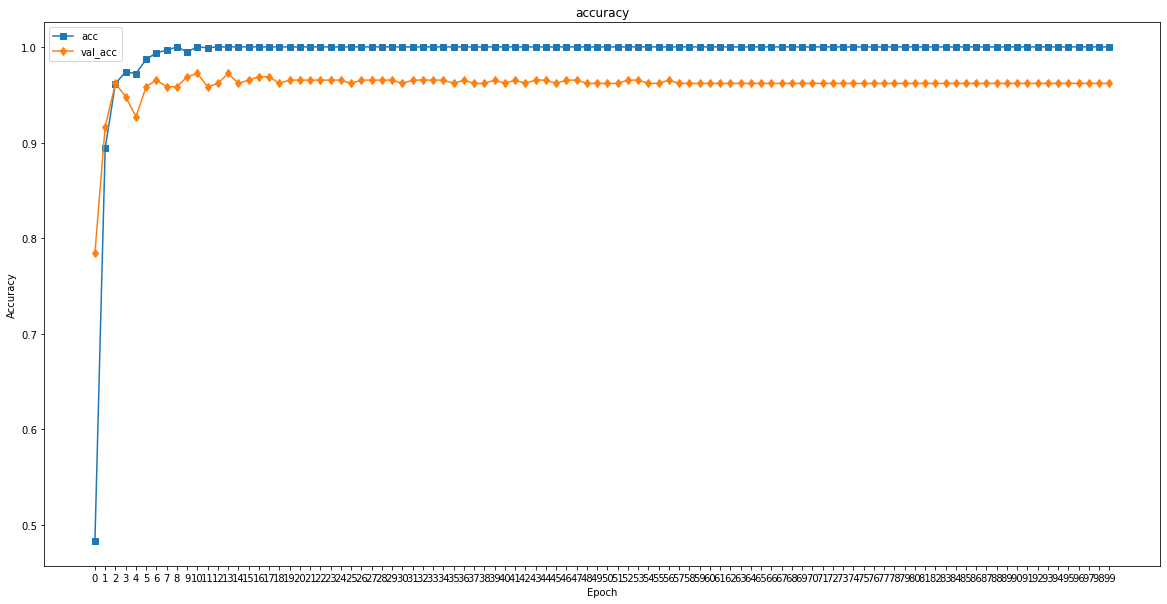

In [27]:
plt.figure(figsize=(20,10))

plt.plot(mnist_cnn_model_history.history['accuracy']    , 's-', label='acc')
plt.plot(mnist_cnn_model_history.history['val_accuracy'], 'd-', label='val_acc')

plt.legend(loc='best')
plt.xticks(np.arange(100))
plt.title('accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [28]:
mnist_cnn_model_eval = mnist_cnn_model.evaluate(X_test , y_test)
mnist_cnn_model_eval

12/12 [==============================] - 0s 5ms/step - loss: 0.1588 - accuracy: 0.9750


[0.1587544083595276, 0.9750000238418579]

#### mnist 이용한 CNN

In [29]:
(X_train , y_train) , (X_test , y_test ) = mnist.load_data()
(X_train.shape , y_train.shape) , (X_test.shape , y_test.shape )

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [30]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , X_train.shape[2] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , X_test.shape[2] , 1)

In [31]:
(X_train.shape , y_train.shape) , (X_test.shape , y_test.shape )

(((60000, 28, 28, 1), (60000,)), ((10000, 28, 28, 1), (10000,)))

In [32]:
print('전처리 - ') 
X_train , X_test =  X_train/255.0 , X_test/255.0

전처리 - 


In [33]:
print('feature extraction - ')
mnist_cnn_model = Sequential()

mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]) , 
                            filters = 32 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'same' , activation = 'relu') ) 
mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same' ) )
mnist_cnn_model.add( Conv2D(filters = 64 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'same' , activation = 'relu') ) 
mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same' ) )
mnist_cnn_model.add( Conv2D(filters = 64 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'same' , activation = 'relu') ) 
mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same' ) )



feature extraction - 


In [34]:
# mnist_cnn_model.summary()
mnist_cnn_model.output_shape

(None, 4, 4, 64)

In [35]:
print('Dense 층 추가 - ')
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.add( Dense(units = 512) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 256) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 128) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 64) )
mnist_cnn_model.add( Activation('relu') )

mnist_cnn_model.add( Dense(units = 10) )
mnist_cnn_model.add( Activation('softmax') )


# mnist_cnn_model.output_shape


Dense 층 추가 - 


In [36]:
mnist_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)        

In [37]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [38]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=12  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

Epoch 1/12
960/960 [==============================] - 8s 7ms/step - loss: 2.3050 - accuracy: 0.1117 - val_loss: 2.3029 - val_accuracy: 0.1060
Epoch 2/12
960/960 [==============================] - 7s 7ms/step - loss: 2.3019 - accuracy: 0.1111 - val_loss: 2.3033 - val_accuracy: 0.1081
Epoch 3/12
960/960 [==============================] - 7s 7ms/step - loss: 2.3023 - accuracy: 0.1112 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 4/12
960/960 [==============================] - 7s 7ms/step - loss: 2.3019 - accuracy: 0.1113 - val_loss: 2.3039 - val_accuracy: 0.1060
Epoch 5/12
960/960 [==============================] - 7s 7ms/step - loss: 2.3023 - accuracy: 0.1113 - val_loss: 2.3027 - val_accuracy: 0.1060
Epoch 6/12
960/960 [==============================] - 7s 7ms/step - loss: 2.3022 - accuracy: 0.1117 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 7/12
960/960 [==============================] - 7s 7ms/step - loss: 2.3018 - accuracy: 0.1116 - val_loss: 2.3037 - val_accuracy: 0.1060
Epoch 

In [39]:
print('모델 저장')
mnist_cnn_model.save('model-case.h12')

모델 저장
INFO:tensorflow:Assets written to: model-case.h12\assets


In [40]:
print('모델 복원')
loaded_model = load_model('model-case.h12')
loaded_model.summary()

모델 복원
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)  

In [41]:
loss , acc = loaded_model.evaluate(X_test , y_test)
print('loss - ' , loss)
print('acc  - ' , acc)

313/313 [==============================] - 1s 4ms/step - loss: 2.3023 - accuracy: 0.1135
loss -  2.3023340702056885
acc  -  0.11349999904632568


#### 이미지 분류 (horse-or-human)

In [42]:
import os 

print('데이터 세트 경로 - ') 
train_horse_dir = 'C:/Users/crid2/ml-data/horse-or-human/horses'
train_human_dir = 'C:/Users/crid2/ml-data/horse-or-human/humans'

print('파일 이름 리스트 - ')

train_horse_fileName  = os.listdir(train_horse_dir)
train_human_fileName  = os.listdir(train_human_dir)

데이터 세트 경로 - 
파일 이름 리스트 - 


In [43]:
train_horse_fileName[:10]

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png']

In [44]:
train_human_fileName[:10]

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png']

In [45]:
print('총 이미지 갯수 - ')
print('horse len - ' , len(train_horse_fileName))
print('horse len - ' , len(train_human_fileName))

총 이미지 갯수 - 
horse len -  500
horse len -  527


In [47]:
train_img_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_img_generator.flow_from_directory(
    'C:/Users/crid2/ml-data/horse-or-human' , 
    target_size = (300, 300) , 
    batch_size  = 128 ,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [48]:
def img_model() :
  img_model = Sequential()

  img_model.add( Conv2D(input_shape = (300, 300, 3) , filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )
      
  img_model.add( Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Flatten() )
  img_model.add( Dense(units = 512) )
  img_model.add( Activation('relu') )
  img_model.add( Dropout(0.25) )
  
  img_model.add( Dense(units = 1) )
  img_model.add( Activation('sigmoid') )

  return img_model 


In [49]:
model = img_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 activation_5 (Activation)   (None, 298, 298, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 149, 149, 16)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 activation_6 (Activation)   (None, 147, 147, 32)      0         
                                                      

In [50]:
model.compile(optimizer = RMSprop(lr = 0.001), 
                      loss= 'binary_crossentropy' , 
                      metrics=['accuracy'] ) 

C:\Users\crid2\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model_history = model.fit(train_generator , epochs = 15 , verbose = 1 , steps_per_epoch = 8 )


Epoch 1/15


In [ ]:
from google.colab import files

upload_img = files.upload()
print(upload_img)
print(upload_img.keys())

for fn in upload_img.keys() :
  print('file name - ' , fn )
  path = '/content/'+fn
  img = image.load_img(path , target_size = (300, 300))
  x   = image.img_to_array(img) 
  x   = np.expand_dims(x , axis = 0 ) 
  image_ = np.vstack([x])

  classes = model.predict(image_ , batch_size = 10 ) 
  print('pred - ' , classes[0])
print('예측하기 - ')



#### 고양이 vs 개 이미지 분류 [실습]

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

In [ ]:
import os
import zipfile

path = '/tmp/cats_and_dogs_filtered.zip' 
zip  = zipfile.ZipFile(path , 'r')

zip.extractall('/tmp')
zip.close()